### Explanatory Data Analysis
Mushroom Secondary Dataset

In [1]:
import pandas as pd
import os
import seaborn as sns
from pandas.plotting import parallel_coordinates, scatter_matrix
import matplotlib.pyplot as plt

In [ ]:
# Load the uploaded mushroom dataset
file_path = "./secondary_data.csv"
df = pd.read_csv(file_path, delimiter=';')

data_info = df.info()
data_description = df.describe(include='all').transpose()
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

# Combine null counts with column data types
data_summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': null_counts,
    'Missing %': null_percent,
    'Unique Values': df.nunique()
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [3]:
data_summary.to_csv('data_summary.csv', index=False)
data_summary

,Data Type,Missing Values,Missing %,Unique Values
class,object,0,0.000000,2
cap-diameter,float64,0,0.000000,2571
cap-shape,object,0,0.000000,7
cap-surface,object,14120,23.121387,11
cap-color,object,0,0.000000,12
does-bruise-or-bleed,object,0,0.000000,2
gill-attachment,object,9884,16.184971,7
gill-spacing,object,25063,41.040462,3
gill-color,object,0,0.000000,12
stem-height,float64,0,0.000000,2226


Missing Data Heatmap

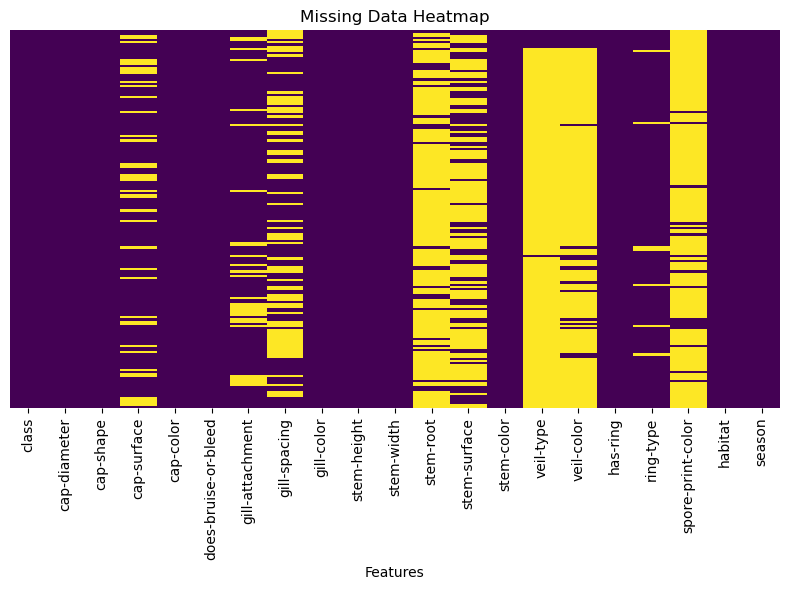

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


Numerical Features Distribution Violin Plot

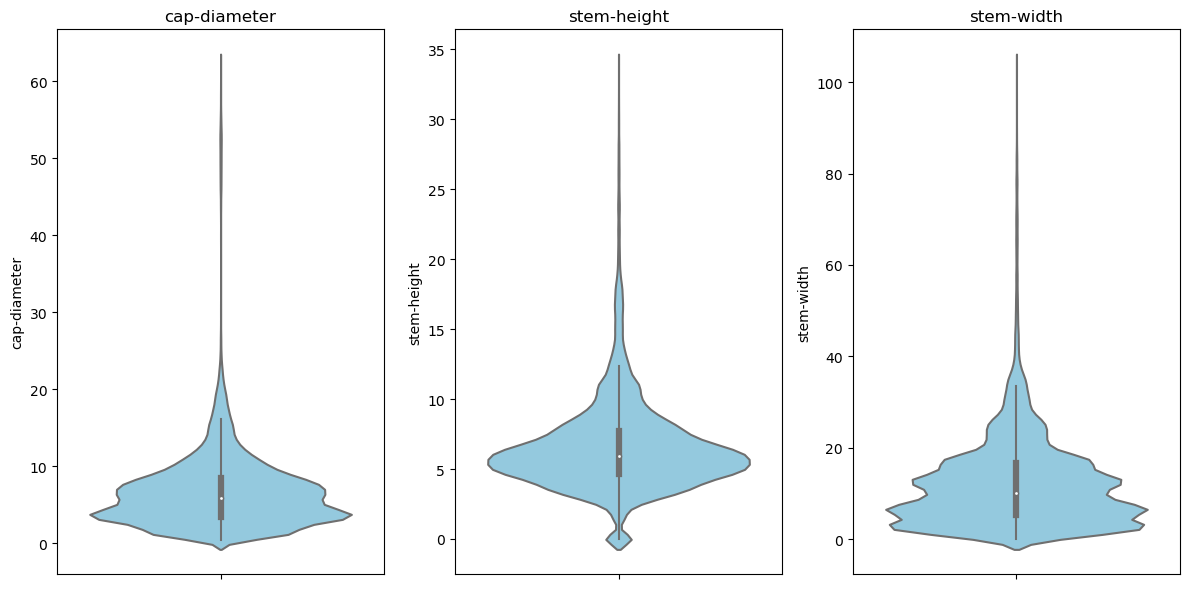

In [ ]:
# Identify numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.violinplot(y=df[column], color="skyblue")
    plt.title(f"{column}")
    plt.tight_layout()

plt.show()


Piechart distribution for binary fields

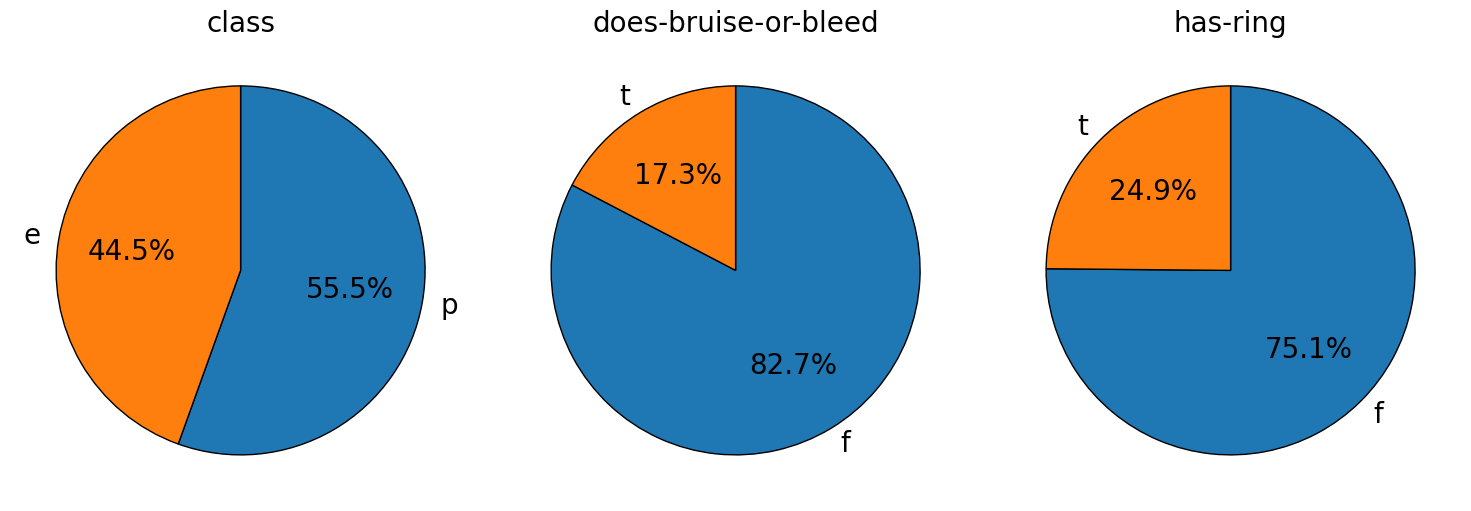

In [ ]:
# Identify binary categorical features (with exactly 2 unique values)
binary_features = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']

# Set up the multi-figure layout
n_cols = 3
n_rows = (len(binary_features) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Generate pie charts for each binary feature
for i, col in enumerate(binary_features, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 20}
    )
    plt.title(f"{col}", fontsize=20)
    plt.ylabel("")

plt.tight_layout()
plt.show()
